In [16]:
from keras.datasets import cifar10
(x_treino, y_treino),(x_teste, y_teste) = cifar10.load_data()

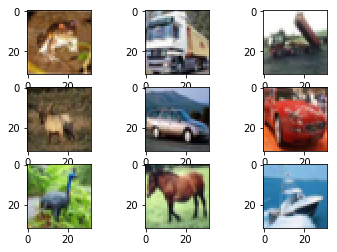

In [17]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_treino[i])
plt.show()

In [18]:
x_treino.shape

(50000, 32, 32, 3)

In [19]:
y_treino.shape

(50000, 1)

In [24]:
#aplicando one hot encoding na variável target
from keras.utils import to_categorical
y_treino = to_categorical(y_treino)
y_teste = to_categorical(y_teste)

In [25]:
x_treino[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [26]:
#Normalizando os dados
x_treino_float = x_treino.astype('float32')
x_teste_float = x_teste.astype('float32')
#Normalizando
x_treino_normalizado = x_treino_float/255.0
x_teste_normalizado = x_teste_float/255.0

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
#Rede
modelo = Sequential()
modelo.add(Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=(32,32,3)))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))
modelo.add(Dropout(0,2))
modelo.add(Conv2D(filters=64, kernel_size=5, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))
modelo.add(Dropout(0,2))
modelo.add(Flatten()) #espaço unidimensional em uma única dimensão
modelo.add(Dense(80, kernel_initializer='glorot_uniform', activation='relu'))
modelo.add(Dropout(0,3))
modelo.add(Dense(10, kernel_initializer='glorot_uniform', activation='softmax'))

In [35]:
#otimizador e função de custo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#treinando o modelo
historico =  modelo.fit(x_treino_normalizado, y_treino, batch_size=200, epochs=50, validation_data=(x_teste_normalizado, y_teste), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 40s 800us/step - loss: 0.7707 - acc: 0.7352 - val_loss: 0.9244 - val_acc: 0.6833
Epoch 2/50
50000/50000 [==============================] - 39s 772us/step - loss: 0.7366 - acc: 0.7451 - val_loss: 0.9182 - val_acc: 0.6871
Epoch 3/50
50000/50000 [==============================] - 40s 807us/step - loss: 0.7094 - acc: 0.7554 - val_loss: 0.9441 - val_acc: 0.6877
Epoch 4/50
50000/50000 [==============================] - 39s 790us/step - loss: 0.6817 - acc: 0.7640 - val_loss: 0.8874 - val_acc: 0.7028
Epoch 5/50
50000/50000 [==============================] - 39s 785us/step - loss: 0.6601 - acc: 0.7714 - val_loss: 0.9042 - val_acc: 0.6945
Epoch 6/50
50000/50000 [==============================] - 39s 784us/step - loss: 0.6292 - acc: 0.7809 - val_loss: 0.8828 - val_acc: 0.7089
Epoch 7/50
50000/50000 [==============================] - 39s 789us/step - loss: 0.6098 - acc: 0.7886 - val_loss: 0.

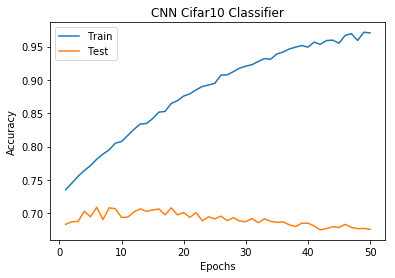

In [36]:
acuracia_treino = historico.history['acc']
acuracia_teste = historico.history['val_acc']

epochs = range(1, len(acuracia_treino)+1)

plt.plot(epochs, acuracia_treino, label='Train')
plt.plot(epochs, acuracia_teste, label='Test')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title("CNN Cifar10 Classifier")

plt.legend()

plt.show()